In [11]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from datos import Datos
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada
from estrategiasparticionado.validacion_simple import ValidacionSimple
from clasificadores.clasificador_naive_bayes import ClasificadorNaiveBayes

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
import numpy as np
import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [2]:
# Cargar datasets
dataset = dataset=Datos('./conjunto_datos/tic-tac-toe.data')
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(dataset.datos[:,:-1])
Y = dataset.datos[:,-1] 
class_names = sorted(dataset.diccionarios[-1].keys())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [3]:
# Clasificador
laplace_smoothing = 0
model = MultinomialNB()

In [4]:
# Validacion cruzada

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
scores = cross_val_score(model, X, Y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.03)


In [5]:
# Entrenamiento para el caso de validacion simple
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("Accuracy: %0.2f" % (score))
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))

Accuracy: 0.69


Confusion matrix, without normalization
[[ 55  76]
 [ 42 211]]
Normalized confusion matrix
[[ 0.41984733  0.58015267]
 [ 0.16600791  0.83399209]]


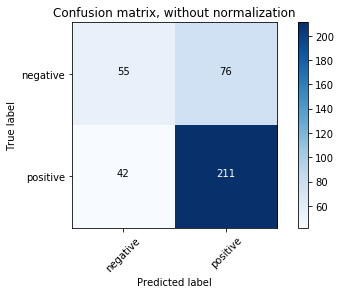

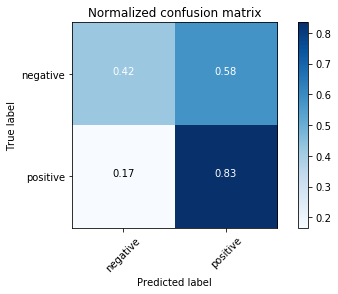

In [6]:
# Mostrar matrices de confusion
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [9]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import clasificadores.clasificador_naive_bayes as nb
import estrategiasparticionado.validacion_cruzada as vc
import estrategiasparticionado.validacion_simple as vs
from datos import Datos

dataset = Datos('./conjunto_datos/tic-tac-toe.data')


clasificador = nb.ClasificadorNaiveBayes()
estrategia_vc = vc.ValidacionCruzada()
estrategia_vs = vs.ValidacionSimple()

estrategia_vs.creaParticiones(dataset.datos)

res_1 = clasificador.validacion(estrategia_vs, dataset)
#res_2 = clasificador.validacion(estrategia_vc, dataset)






The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 425.  245.] 670.0
atributo:
[{2: 0.70117647058823529, 1: 0.29882352941176471, 0: 0.0}, {2: 0.59183673469387754, 1: 0.40816326530612246, 0: 0.0}]
atributo:
[{2: 0.71999999999999997, 1: 0.0, 0: 0.28000000000000003}, {2: 0.7795918367346939, 1: 0.0, 0: 0.22040816326530613}]
atributo:
[{2: 0.47764705882352942, 1: 0.29176470588235293, 0: 0.23058823529411765}, {2: 0.37142857142857144, 1: 0.44489795918367347, 0: 0.18367346938775511}]
atributo:
[{2: 0.34823529411764703, 1: 0.38823529411764707, 0: 0.2635294117647059}, {2: 0.45306122448979591, 1: 0.31020408163265306, 0: 0.23673469387755103}]
atributo:
[{1: 0.23999999999999999, 0: 0.19058823529411764, 2: 0.56941176470588239}, {1: 0.58367346938775511, 0: 0.14285714285714285, 2: 0.27346938775510204}]
atributo:
[{1: 0.35999999999999999, 0: 0.29411764705882354, 2: 0.34588235294117647}, {1: 0.31428571428571428, 0: 0.26530612244897961, 2: 0.42040816326530611}]
atri